<a href="https://colab.research.google.com/github/maleal2/Hands-On-Artificial-Intelligence-for-IoT/blob/main/Voting(BaggingClassifier)_Multicategory__wine_quality_red_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing neecessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier , BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns


In [2]:
# Extracting CSV file into new dataframe called: df.
df= pd.read_csv("/content/sample_data/winequality-red.csv", sep=";")


In [3]:
# Inspecting dataframe.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Categorizing wine quality for more than two classes.
bins = (0, 3.5,5.5, 10)
categories = pd.cut(df['quality'], bins, labels=['bad', 'ok','good'])
df['quality'] = categories

# Display value counts
print(df['quality'].value_counts())

good    855
ok      734
bad      10
Name: quality, dtype: int64


In [5]:
# Selecting all columns except the last one for "X" , then normalizing the values of X.
X = df.drop(['quality'], axis=1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
Y = df[['quality']] # Selecting all values under "quality" column.

In [6]:
label_encoder = LabelEncoder()  # Converting 2D array into 1D array.
y = label_encoder.fit_transform(Y['quality'])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.2, random_state=323)  # Splitting dataset.

In [8]:
# Declare BaggingClassifier classifier
bag_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,max_samples=1000,bootstrap=True,n_jobs=-1, random_state=0)

In [9]:
bag_classifier.fit(X_train, Y_train)  # Fitting the data.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=1000,
                  n_estimators=500, n_jobs=-1, random_state=0)

In voting, we used different algorithms for training on the same dataset.

In [10]:
y_pre = bag_classifier.predict(X_test)  # Predictin values for Y.

In [11]:
print("Accuracy is {}".format(accuracy_score(Y_test,y_pre)))  # Printing accuracy between predicted value and the expected value.

Accuracy is 0.796875


<Axes: >

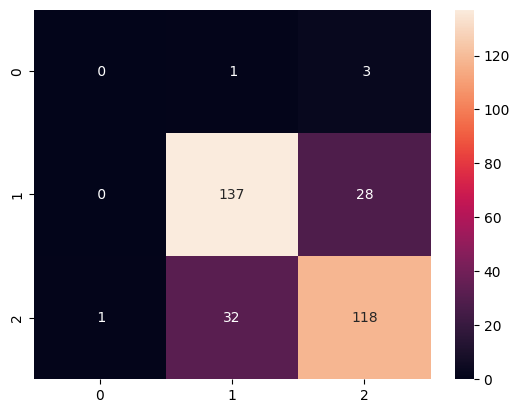

In [12]:
cm= confusion_matrix(Y_test, y_pre)
sns.heatmap(cm,annot=True, fmt='2.0f')  # Deploying confusion matrix for expected values and predictions.